<a href="https://colab.research.google.com/github/Azfareza/Computational-Biology/blob/main/Uas_studkas_sc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

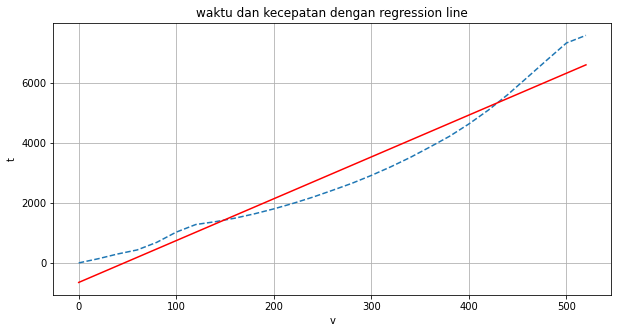

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.interpolate import CubicSpline

def regresi(x,y):
    n = np.size(x)

    x_mean = np.mean(x)
    y_mean = np.mean(y)

    sum_xy = np.sum(y*(x-x_mean))
    sum_xx = np.sum(x*(x-x_mean))
    b = sum_xy/sum_xx
    a = y_mean - b*x_mean
    return a,b

# kumpulan data dan kecepatan

t = np.array([0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360,380,400,420,440,460,480,500,520]) #waktu
v = np.array([0,139,298,433,685,1026,1279,1373,1490,1634,1800,1986,2191,2417,2651,2915,3203,3516,3860,4216,4630,5092,5612,6184,6760,7327,7581]) #kecepatan

f = regresi(t,v)
y_new = f[0] + f[1]*t

plt.figure(figsize=(10,5))
plt.title('waktu dan kecepatan dengan regression line')
plt.plot(t,v,'--')
plt.plot(t,y_new,'r-')
plt.xlabel('v')
plt.ylabel('t')
plt.grid()
plt.show()

In [ ]:
def simp(f,a,b,n):
    x = np.linspace(a,b,n)
    h = (b-a)/(n-1)
    f1 = f(x)
    y = (h/3) * (f1[0]+(4*sum(f1[1:n - 1:2])+(2*sum(f1[:n - 2:2]))) + f1[n-1])
    return y

f = CubicSpline(t,v,bc_type='natural')
s_range = 0
s_position = 0
s_position_array = []
ketinggian = 0

for tinggi in t:
    s_range = simp(f,0,tinggi,100)-8
    if(s_range >= 12000):
        print('jarak roket pada ketinggian 12.000 m (stratosphere) pada saat x adalah %2.f s'%tinggi)
        break
    tinggi = tinggi + 20
for tinggi in t:
    s_range = simp(f,0,tinggi,100)-8
    if(s_range >= 50000):
        print('jarak roket pada ketinggian 50.000 m (mesosphere) pada saat x adalah %2.f s'%tinggi)
        break
    tinggi = tinggi + 20
for tinggi in t:
    s_range = simp(f,0,tinggi,100)-8
    if(s_range >= 800000):
        print('jarak roket pada ketinggian 80.000 m (exosphere) pada saat x adalah %2.f s'%tinggi)
        break
    tinggi = tinggi + 20
for i in range(27):
    s_position_first = -8
    s_position = simp(f,0,i*20,100)-8
    s_position_array.append(s_position)


jarak roket pada ketinggian 12.000 m (stratosphere) pada saat x adalah 60 s
jarak roket pada ketinggian 50.000 m (mesosphere) pada saat x adalah 120 s
jarak roket pada ketinggian 80.000 m (exosphere) pada saat x adalah 420 s


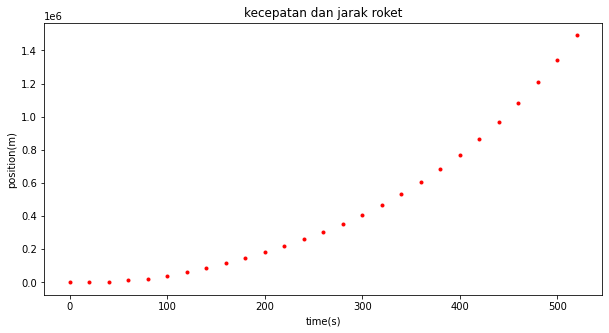

In [ ]:
plt.figure(figsize=(10,5),facecolor='white')
plt.title('kecepatan dan jarak roket')
plt.plot(t,s_position_array,'r.')
plt.xlabel('time(s)')
plt.ylabel('position(m)')
plt.show()

In [ ]:
def second(f,x,h):
    return (-f(x+2*h)+4*f(x+h)-3*f(x))/(2*h)

y=0
y_array = [0]
print('Percepatan pada tinggi = %ds adalah 0 m/s^2'%y)
for i in range(26):
    y=second(f,(i+1)*20,1e-4)
    print('percepatan pada tinggi = %ds adalah %2.f m/s^2'%((i+1)*20,y))
    y_array.append(y)

Percepatan pada tinggi = 0s adalah 0 m/s^2
percepatan pada tinggi = 20s adalah  8 m/s^2
percepatan pada tinggi = 40s adalah  7 m/s^2
percepatan pada tinggi = 60s adalah  9 m/s^2
percepatan pada tinggi = 80s adalah 16 m/s^2
percepatan pada tinggi = 100s adalah 16 m/s^2
percepatan pada tinggi = 120s adalah  8 m/s^2
percepatan pada tinggi = 140s adalah  4 m/s^2
percepatan pada tinggi = 160s adalah  7 m/s^2
percepatan pada tinggi = 180s adalah  8 m/s^2
percepatan pada tinggi = 200s adalah  9 m/s^2
percepatan pada tinggi = 220s adalah 10 m/s^2
percepatan pada tinggi = 240s adalah 11 m/s^2
percepatan pada tinggi = 260s adalah 11 m/s^2
percepatan pada tinggi = 280s adalah 12 m/s^2
percepatan pada tinggi = 300s adalah 14 m/s^2
percepatan pada tinggi = 320s adalah 15 m/s^2
percepatan pada tinggi = 340s adalah 17 m/s^2
percepatan pada tinggi = 360s adalah 17 m/s^2
percepatan pada tinggi = 380s adalah 19 m/s^2
percepatan pada tinggi = 400s adalah 22 m/s^2
percepatan pada tinggi = 420s adalah 24 m

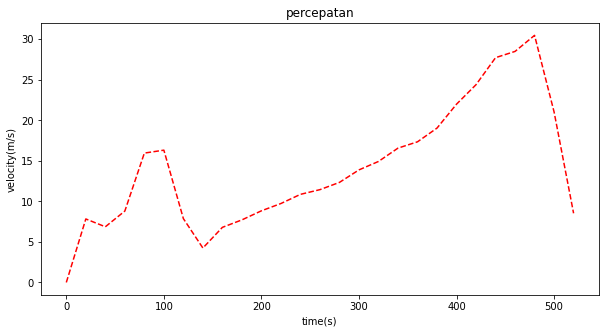

In [ ]:
plt.figure(figsize=(10,5),facecolor='white')
plt.title('percepatan')
plt.plot(t,y_array,'r--')
plt.xlabel('time(s)')
plt.ylabel('velocity(m/s)')
plt.show()